In [620]:
import numpy as np
import pandas as pd 
import json
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data files

In [621]:
#Loading the student.json file to view
with open("student.json", "r") as file:
    data = json.load(file)
print(json.dumps(data, indent=4))


{
    "quiz": {
        "id": 43,
        "name": null,
        "title": "Structural Organisation in Animals and Plants (7)",
        "description": "",
        "difficulty_level": null,
        "topic": "Structural Organisation in Animals",
        "time": "2024-07-03T00:00:00.000+05:30",
        "is_published": true,
        "created_at": "2024-07-03T11:00:08.958+05:30",
        "updated_at": "2024-09-23T18:43:27.751+05:30",
        "duration": 128,
        "end_time": "2024-07-04T00:00:00.000+05:30",
        "negative_marks": "1.0",
        "correct_answer_marks": "4.0",
        "shuffle": true,
        "show_answers": true,
        "lock_solutions": false,
        "is_form": false,
        "show_mastery_option": false,
        "quiz_type": null,
        "is_custom": false,
        "banner_id": null,
        "exam_id": null,
        "show_unanswered": false,
        "ends_at": "2025-01-18",
        "lives": null,
        "live_count": "Free Test",
        "coin_count": -1,
        "

In [622]:
#Loading the submitted.json file to view
with open("submitted.json", "r") as file:
    data1 = json.load(file)
print(json.dumps(data1, indent=4))


{
    "id": 336566,
    "quiz_id": 43,
    "user_id": "7ZXdz3zHuNcdg9agb5YpaOGLQqw2",
    "submitted_at": "2025-01-17T15:51:29.859+05:30",
    "created_at": "2025-01-17T15:51:29.871+05:30",
    "updated_at": "2025-01-17T15:51:29.871+05:30",
    "score": 32,
    "trophy_level": 2,
    "accuracy": "80 %",
    "speed": "100",
    "final_score": "30.0",
    "negative_score": "2.0",
    "correct_answers": 8,
    "incorrect_answers": 2,
    "source": "live",
    "type": "topic",
    "started_at": "2025-01-17T16:20:44.000+05:30",
    "ended_at": "2025-01-17T16:21:28.000+05:30",
    "duration": "15:00",
    "better_than": 24,
    "total_questions": 128,
    "rank_text": "Topic Rank - #2402",
    "mistakes_corrected": 6,
    "initial_mistake_count": 8,
    "response_map": {
        "1837": 7363,
        "1848": 7407,
        "1852": 7423,
        "1862": 7464,
        "1877": 7525,
        "1878": 7529,
        "1900": 7617,
        "1917": 7685,
        "1934": 7750,
        "1964": 7872
    }

In [623]:
#Loading historical.json file to view
with open("historical.json", "r") as file:
    data2 = json.load(file)
print(json.dumps(data2, indent=4))

[
    {
        "id": 336497,
        "quiz_id": 51,
        "user_id": "YcDFSO4ZukTJnnFMgRNVwZTE4j42",
        "submitted_at": "2025-01-17T15:30:18.027+05:30",
        "created_at": "2025-01-17T15:30:18.044+05:30",
        "updated_at": "2025-01-17T15:30:18.044+05:30",
        "score": 108,
        "trophy_level": 2,
        "accuracy": "90 %",
        "speed": "100",
        "final_score": "105.0",
        "negative_score": "3.0",
        "correct_answers": 27,
        "incorrect_answers": 3,
        "source": "exam",
        "type": "topic",
        "started_at": "2025-01-17T15:18:30.000+05:30",
        "ended_at": "2025-01-17T15:30:15.000+05:30",
        "duration": "15:00",
        "better_than": 107,
        "total_questions": 100,
        "rank_text": "Topic Rank - #-171",
        "mistakes_corrected": 9,
        "initial_mistake_count": 12,
        "response_map": {
            "2523": 10109,
            "2529": 10130,
            "2533": 10149,
            "2534": 10151,
     

In [624]:
# Removing Null values
def remove_nulls(obj):
    if isinstance(obj, dict):
        return {k: remove_nulls(v) for k, v in obj.items() if v is not None}
    elif isinstance(obj, list):
        return [remove_nulls(v) for v in obj if v is not None]
    else:
        return obj
cleaned_data = remove_nulls(data2)

# Save the cleaned JSON back to a file
with open("cleaned_data.json", "w") as file:
    json.dump(cleaned_data, file, indent=4)

In [625]:
#Loading Cleaned json File
with open("cleaned_data.json", "r") as file:
    cleaned_data = json.load(file)
print(json.dumps(cleaned_data, indent=4))

[
    {
        "id": 336497,
        "quiz_id": 51,
        "user_id": "YcDFSO4ZukTJnnFMgRNVwZTE4j42",
        "submitted_at": "2025-01-17T15:30:18.027+05:30",
        "created_at": "2025-01-17T15:30:18.044+05:30",
        "updated_at": "2025-01-17T15:30:18.044+05:30",
        "score": 108,
        "trophy_level": 2,
        "accuracy": "90 %",
        "speed": "100",
        "final_score": "105.0",
        "negative_score": "3.0",
        "correct_answers": 27,
        "incorrect_answers": 3,
        "source": "exam",
        "type": "topic",
        "started_at": "2025-01-17T15:18:30.000+05:30",
        "ended_at": "2025-01-17T15:30:15.000+05:30",
        "duration": "15:00",
        "better_than": 107,
        "total_questions": 100,
        "rank_text": "Topic Rank - #-171",
        "mistakes_corrected": 9,
        "initial_mistake_count": 12,
        "response_map": {
            "2523": 10109,
            "2529": 10130,
            "2533": 10149,
            "2534": 10151,
     

In [626]:
#Function to convert json data into dataframe for better visualisation
def newdata(data2):
    student_data=[]
    date_format = "%Y-%m-%dT%H:%M:%S.%f%z"
    #selecting required data elements from cleaned data
    for r in data2:
        user_id=r['user_id']
        quiz_id=r['quiz_id']
        quiz_title=(r['quiz']['title'][:-4]).strip().lower()
        quiz_topic=(r['quiz']['topic']).strip().lower()
        score=float(r['final_score'])
        accuracy=float((r['accuracy'].split(" "))[0])
        time_taken=(datetime.fromisoformat(r['ended_at']))-(datetime.fromisoformat(r['started_at']))
        date=(datetime.strptime(r['quiz']['end_time'][:-6], "%Y-%m-%dT%H:%M:%S.%f").date())
        duration=r['duration']
        correct_answers=r['correct_answers']
        incorrect=r['incorrect_answers']
        total_questions=r['total_questions']
        mistakes_not_corrected=(int(r['initial_mistake_count'])-int(r["mistakes_corrected"]))
        questions=int(r['quiz']["questions_count"])

    #selecting columns for student data
        student_data.append({
                'user_id':user_id,
                'quiz_title': quiz_title,
                'quiz_id': quiz_id,
                'quiz_topic': quiz_topic,
                'score': score,
                'accuracy': accuracy,
                'time_taken': time_taken,
                'correct_answers': correct_answers,
                'incorrect_answers':incorrect,
                'total_questions': total_questions,
                'duration': duration,
                'questions-count':questions,
                'Date' : date,
                'mistakes_not_corrected':mistakes_not_corrected

            })
    return pd.DataFrame(student_data)

In [627]:
#students_data contains data of all users
students_data=newdata(cleaned_data)

In [628]:
print(students_data)

                         user_id                               quiz_title  \
0   YcDFSO4ZukTJnnFMgRNVwZTE4j42                         human physiology   
1   YcDFSO4ZukTJnnFMgRNVwZTE4j42                         human physiology   
2   YcDFSO4ZukTJnnFMgRNVwZTE4j42                         human physiology   
3   YcDFSO4ZukTJnnFMgRNVwZTE4j42                         human physiology   
4   YcDFSO4ZukTJnnFMgRNVwZTE4j42                         human physiology   
5   YcDFSO4ZukTJnnFMgRNVwZTE4j42                                 reproduc   
6   YcDFSO4ZukTJnnFMgRNVwZTE4j42                         human physiology   
7   YcDFSO4ZukTJnnFMgRNVwZTE4j42  principles of inheritance and variation   
8   YcDFSO4ZukTJnnFMgRNVwZTE4j42                microbes in human welfare   
9   YcDFSO4ZukTJnnFMgRNVwZTE4j42                      reproductive health   
10  YcDFSO4ZukTJnnFMgRNVwZTE4j42                 human health and disease   
11  YcDFSO4ZukTJnnFMgRNVwZTE4j42                      reproductive health   

Get the complete data of student By Student User ID

In [629]:
#Function to get particuler user data
def Get_user_data(df, user_id):
    #removing userid column
    new= df[df["user_id"] == user_id].drop(columns=['user_id'])
    new=new.sort_values(by=["quiz_topic", "Date"], ascending=[True, True])
    new = new.reset_index(drop=True)
    return new

user_data=Get_user_data(student_data,'YcDFSO4ZukTJnnFMgRNVwZTE4j42')

In [630]:
print(user_data)

                                     quiz_title  quiz_id  \
0                         Human Physiology (15)       51   
1                         Human Physiology (15)       51   
2                         Human Physiology (15)       51   
3                          Human Physiology PYQ        6   
4                          Human Physiology PYQ        6   
5                          Human Physiology PYQ        6   
6                                  Reproduction       57   
7                                  Reproduction       58   
8                         Human Physiology (14)       50   
9                  HUMAN HEALTH AND DISEASE PYQ       25   
10               MICROBES IN HUMAN WELFARE  PYQ       24   
11  PRINCIPLES OF INHERITANCE AND VARIATION PYQ       20   
12                      REPRODUCTIVE HEALTH PYQ       18   
13                      REPRODUCTIVE HEALTH PYQ       18   

                                  quiz_topic  score  accuracy      time_taken  \
0                B

In [642]:
user_data.columns

Index(['quiz_title', 'quiz_id', 'quiz_topic', 'score', 'accuracy',
       'time_taken', 'correct_answers', 'incorrect_answers', 'total_questions',
       'duration', 'questions-count', 'Date', 'mistakes_not_corrected'],
      dtype='object')

In [644]:
#Function to print the performance of given user id 
def Performance(user_data):
    df = user_data.copy()
    df['correct_answers'] = df['correct_answers'].astype(int)
    df['total_questions'] = df['total_questions'].astype(int)

    df['Percent'] = df.apply(lambda row: round((row['score'] / (row['total_questions']*4)) * 100,2), axis=1)
    conditions = [
        df['Percent'] >= 90,
        df['Percent'] >= 70,
        df['Percent'] >= 60,
        df['Percent'] >= 40,
    ]
    df['time_taken_seconds'] = df['time_taken'].dt.total_seconds()
    choices = ['Excellent', 'Good', 'Average', 'Bad']
    df['Performance'] = np.select(conditions, choices, default='Poor')
    
    df = df[['quiz_topic', 'correct_answers','incorrect_answers', 'total_questions', 'Percent','accuracy','score','Performance','Date','time_taken_seconds']] 
    print(f"{'Topic':<50} {'Score':>20}{'Accuracy':>12}{'% Per':>10}{'Performance':>13}")
    for i in range(len(df)):
        print(f"{df['quiz_topic'][i]:<50} {df['score'][i]:>20} {df['accuracy'][i]:>10} {df['Percent'][i]:>{10}.2f}  {df['Performance'][i]:<20}")
    return df

In [645]:
sd=performance(user_data)
print(sd)

Topic                                                             Score    Accuracy     % Per  Performance
Body Fluids and Circulation                                       105.0       90.0      26.25  Poor                
Body Fluids and Circulation                                       115.0       96.0      28.75  Poor                
Body Fluids and Circulation                                        16.0       31.0       4.00  Poor                
Body Fluids and Circulation                                        92.0      100.0     100.00  Excellent           
Body Fluids and Circulation                                        35.0       90.0      38.04  Poor                
Body Fluids and Circulation                                        27.0       50.0      29.35  Poor                
Human Reproduction                                                 24.0       38.0       6.74  Poor                
Reproductive Health                                                35.0       43.

In [646]:
#Function to print barplot of percentage of topics
def Barplot_Score_Topic(sd):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='quiz_topic', y='Percent', data=sd, palette='viridis', errorbar=None)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', ha="center", fontsize=10)

    plt.xlabel('Quiz Topic', fontsize=12)
    plt.ylabel('Percentage Score', fontsize=12)
    plt.title('Performance by Quiz Topic', fontsize=14)
    plt.axhline(y=50, color='red', linestyle='--', linewidth=2, label='50% Threshold')
    plt.legend()
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

In [647]:
#Function to print barplot of percentage against accuracy
def Barplot_Percentage_Accuracy(sd):
    plt.figure(figsize=(12, 7))
    sd_grouped = sd.groupby('quiz_topic')[['Percent', 'accuracy']].mean().reset_index()  # Calculate means
    width = 0.35  
    x = range(len(sd_grouped))
    plt.bar(x, sd_grouped['Percent'], width, label='Percentage', color='skyblue')
    plt.bar([i + width for i in x], sd_grouped['accuracy'], width, label='Accuracy', color='lightcoral')  # Offset bars

    plt.xlabel('Quiz Topic', fontsize=12)
    plt.ylabel('Percentage / Accuracy', fontsize=12)
    plt.title('Average Percentage and Accuracy by Quiz Topic', fontsize=14)

    plt.xticks([i + width/2 for i in x], sd_grouped['quiz_topic'], rotation=45, ha='right')  # Center x-axis ticks
    plt.legend()
    plt.tight_layout()
    plt.show()


In [648]:
#Function for multi scatter plot of each quiz topic for time against performance/accuracy
def Facetgrid_Accuracy_Timetaken(sd):
    colors = {'Percentage': 'blue', 'Accuracy': 'black'}
    g = sns.FacetGrid(sd, col='quiz_topic', col_wrap=3, height=4, aspect=1.2)

    for label, color in colors.items():
        if label == 'Percentage':
            g.map_dataframe(sns.scatterplot, x='time_taken_seconds', y='Percent', color=color, label=label, marker='o')
        else:
            g.map_dataframe(sns.scatterplot, x='time_taken_seconds', y='accuracy', color=color, label=label, marker='x')

    g.set_axis_labels('Time Taken (seconds)', 'Percentage / Accuracy')
    g.set_titles('{col_name}')

    handles = [plt.Line2D([], [], marker='o', linestyle='', color='blue', label='Percentage'),
               plt.Line2D([], [], marker='x', linestyle='', color='black', label='Accuracy')]
    
    plt.legend(handles=handles, loc='upper right', title='Legend')
    plt.tight_layout()
    plt.show()

In [649]:
#Function for heatmap 
def Heatmap_Date_Averagescore(sd):
    pivot_data = sd.pivot_table(index='quiz_topic', columns='Date', values='score', aggfunc='mean')
    plt.figure(figsize=(12,8))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Average Score'})
    plt.title('Average Score by Quiz Topic and Date')
    plt.show()

In [656]:
#Function for accuracy plot
def Ratio_Correct_Incorrect(sd):
    quiz_data = sd.groupby('quiz_topic')[['correct_answers', 'incorrect_answers']].sum().reset_index()
    quiz_data.set_index('quiz_topic').plot(kind='bar', stacked=True, figsize=(12,6), color=['green', 'red'])
    plt.xlabel('Quiz Topic')
    plt.ylabel('Answer Count')
    plt.title('Correct vs Incorrect Answers by Topic')
    plt.xticks(rotation=90)
    plt.show()

In [651]:
#Function to get the weak areas of the student
def weak_areas(data):
    df = data.copy()

    # Normalize quiz_topic text
    df['quiz_topic'] = df['quiz_topic'].str.strip().str.lower()

    # Weak topics where percent < 50
    weak_topics = (df[df['Percent'] < 50][['quiz_topic']].drop_duplicates()).reset_index(drop=True)

    # Students performing poorly
    bad_performance = df[df['Percent'] < 50][['quiz_topic', 'Percent', 'accuracy']]

    # Students with low accuracy
    inaccuracy = df[df['accuracy'] < 50][['quiz_topic', 'accuracy', 'Percent']]

    # Students taking too little time 
    bad_time_management = df[(( df['time_taken_seconds']>500)&(df['Percent'] < 50)&(df['accuracy'] > 60))][['quiz_topic', 'time_taken_seconds', 'accuracy', 'Percent']]

    print(f"Weak Topics of Student ::( Student has to Prepare these topics as Performance is Not Good)\n {weak_topics}\n")
    print(f"Bad Performance Stats ::( These are the stats where student does not perform well)\n {bad_performance}\n")
    print(f"Inaccurate Answering ::( In these topics Student have unclear concepts, needs to revise the topics)\n {inaccurate_answering}\n")
    print(f"Bad Time Management ::( Student was accurate while solving problems but bad time management leads to poor performance)\n {bad_time_management}\n")

In [652]:
#Function to run the all previous functions and get the student information and insights
def Recommendation_for_user(data,user):
    Total_data=newdata(data)
    User_data=Get_user_data(Total_data,user)
    print(f"\nThese are the STATS of user: {user} in all Quizzes :: ")
    performance=Performance(User_data)
    print(f"\n\n\nThis Barplot is Showing average performance in each Quiz Topic,\nIf Percentage Score Bar is below red line it shows user has to improve those topics ::\n")
    Barplot_Score_Topic(performance)
    print(f"This Plot is Showing relations between Percentage and Accuracy in each Quiz Topic.\nIf Percentage is Good and Accuracy is low it shows user is not focused and solving problems in hurry,\nIf vice versa it shows user is wasting too much time to solve each individual problem.")
    Barplot_Percentage_Accuracy(performance)
    print(f"This Plot is showing the effect of change in time taken in seconds on performance and accuracy of each topic\n\n")
    Facetgrid_Accuracy_Timetaken(performance)
    print(f"This Plot is Showing Average Score of each topic on particular date, Showing whether user is Improving or Not .\n\n")
    Heatmap_Date_Averagescore(performance)
    print(f"This Plot is Showing Ratio of the correct answers solved against ratio of incorrect answers,\nIt Basically shows the accuracy of the student, Whole bar showing total questions attempted , red portion shows incorrect and green shows correct\n\n")
    Ratio_Correct_Incorrect(performance)
    weak_areas(performance)


These are the STATS of user: YcDFSO4ZukTJnnFMgRNVwZTE4j42 in all Quizzes :: 
Topic                                                             Score    Accuracy     % Per  Performance
body fluids and circulation                                        92.0      100.0     100.00  Excellent           
body fluids and circulation                                        35.0       90.0      38.04  Poor                
body fluids and circulation                                        27.0       50.0      29.35  Poor                
body fluids and circulation                                       105.0       90.0      26.25  Poor                
body fluids and circulation                                       115.0       96.0      28.75  Poor                
body fluids and circulation                                        16.0       31.0       4.00  Poor                
human health and disease                                          110.0       93.0      67.07  Average             
hum

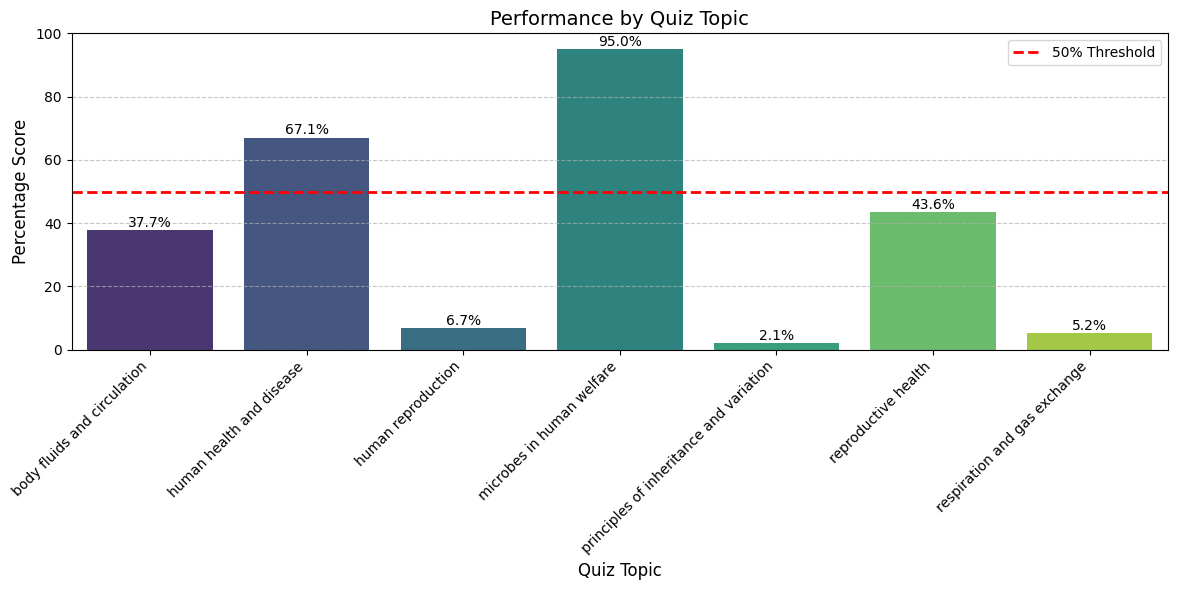

This Plot is Showing relations between Percentage and Accuracy in each Quiz Topic.
If Percentage is Good and Accuracy is low it shows user is not focused and solving problems in hurry,
If vice versa it shows user is wasting too much time to solve each individual problem.


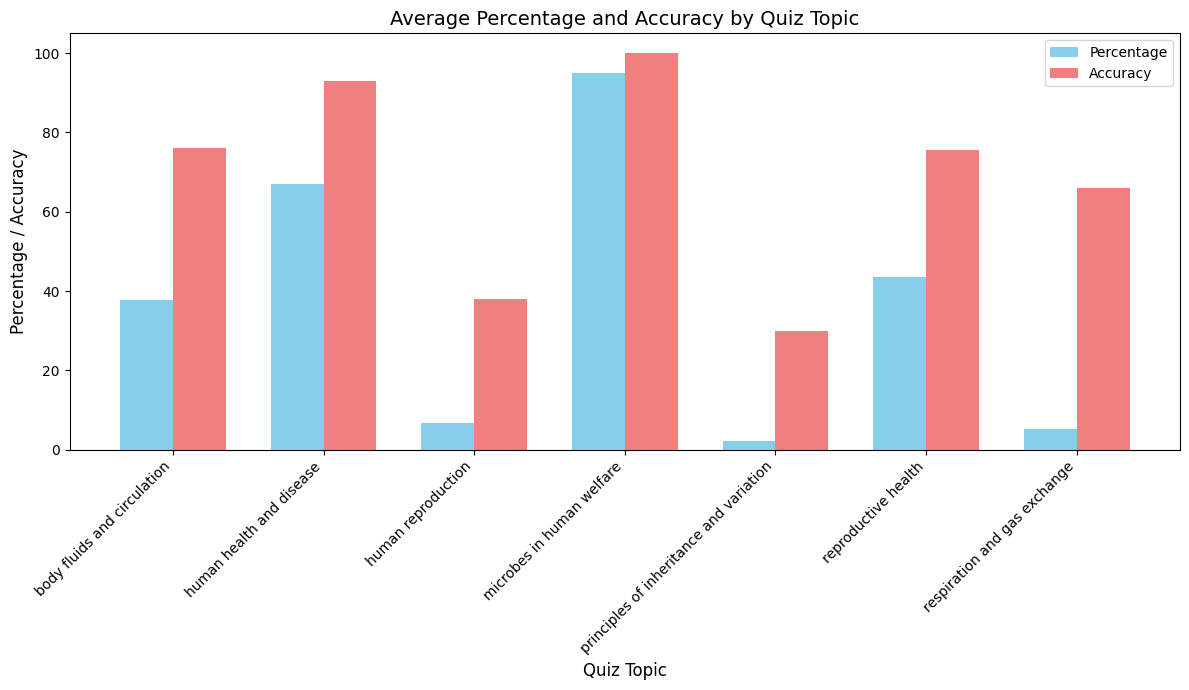

This Plot is showing the effect of change in time taken in seconds on performance and accuracy of each topic




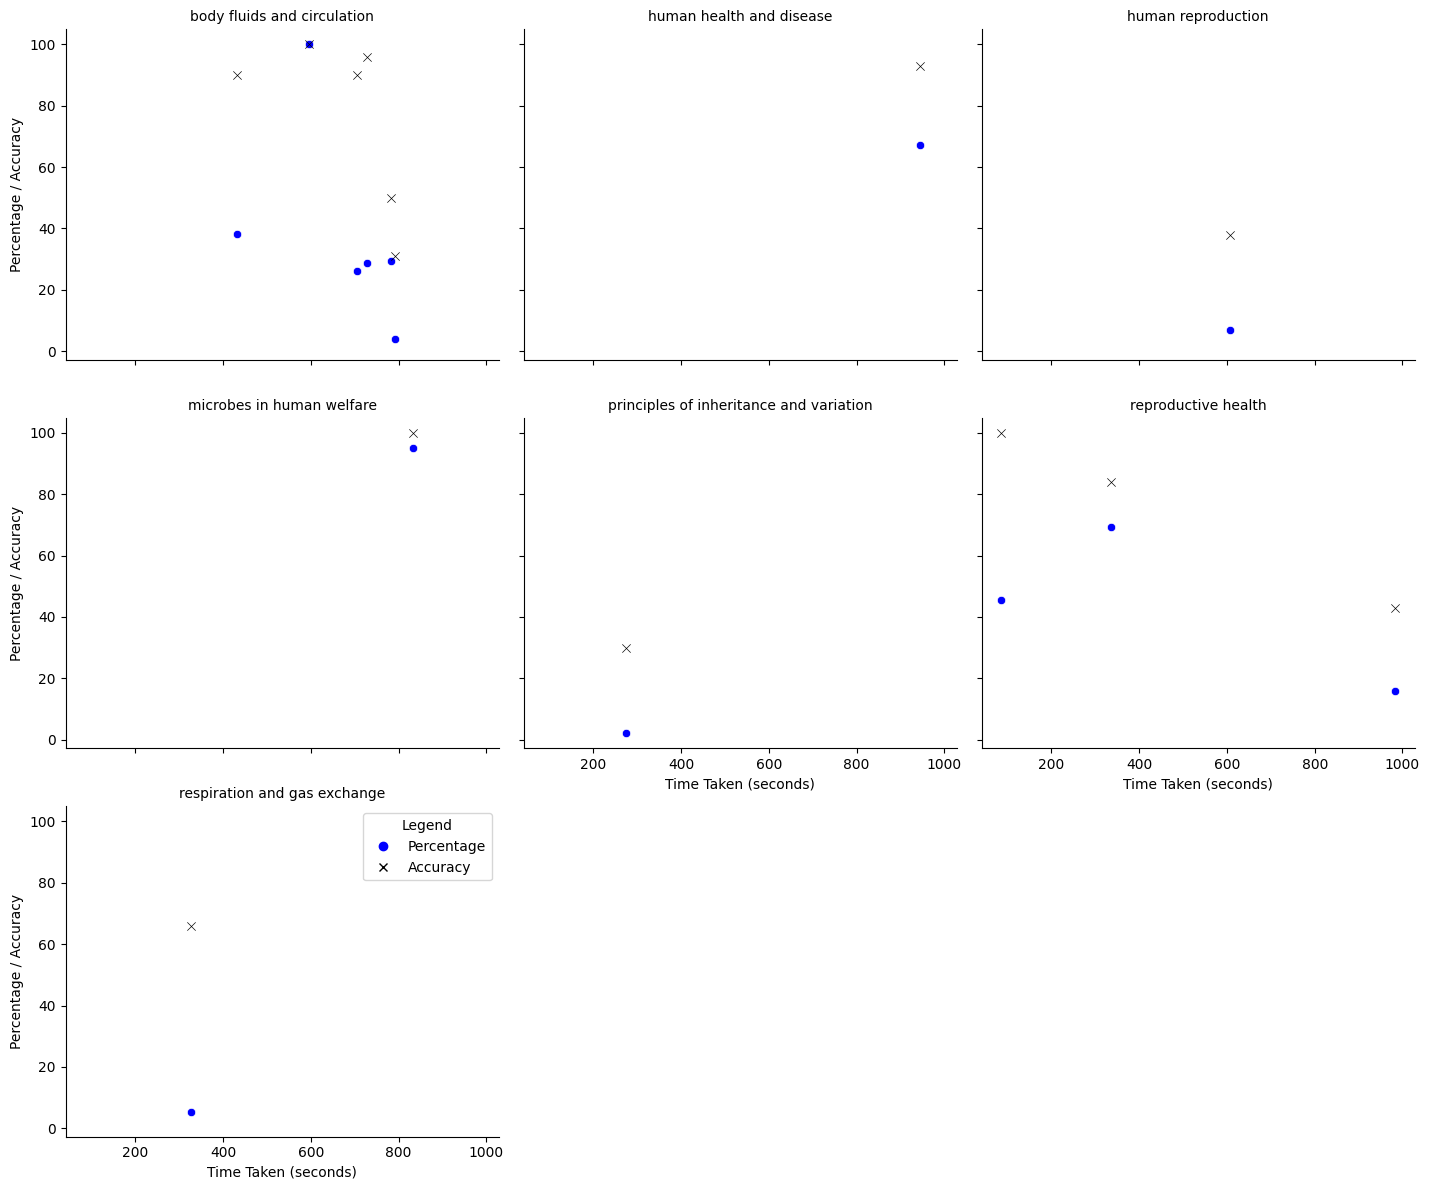

This Plot is Showing Average Score of each topic on particular date, Showing whether user is Improving or Not .




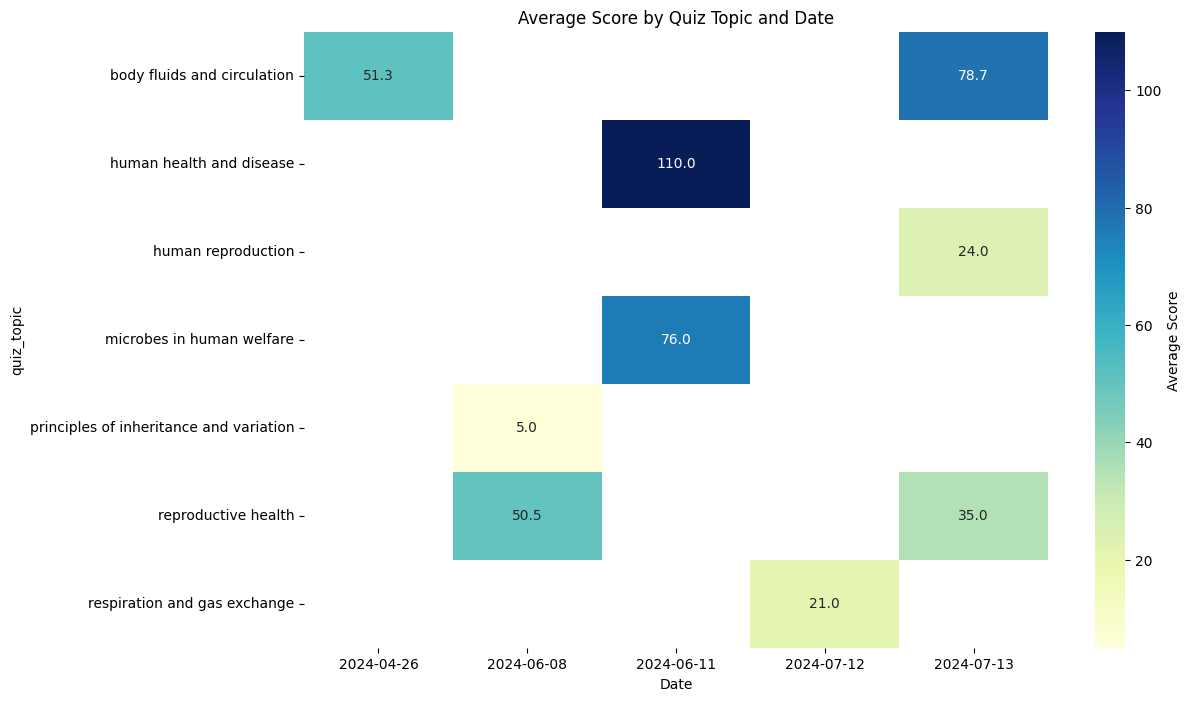

This Plot is Showing Ratio of the correct answers solved against ratio of incorrect answers,
It Basically shows the accuracy of the student, Whole bar showing total questions attempted , red portion shows incorrect and green shows correct




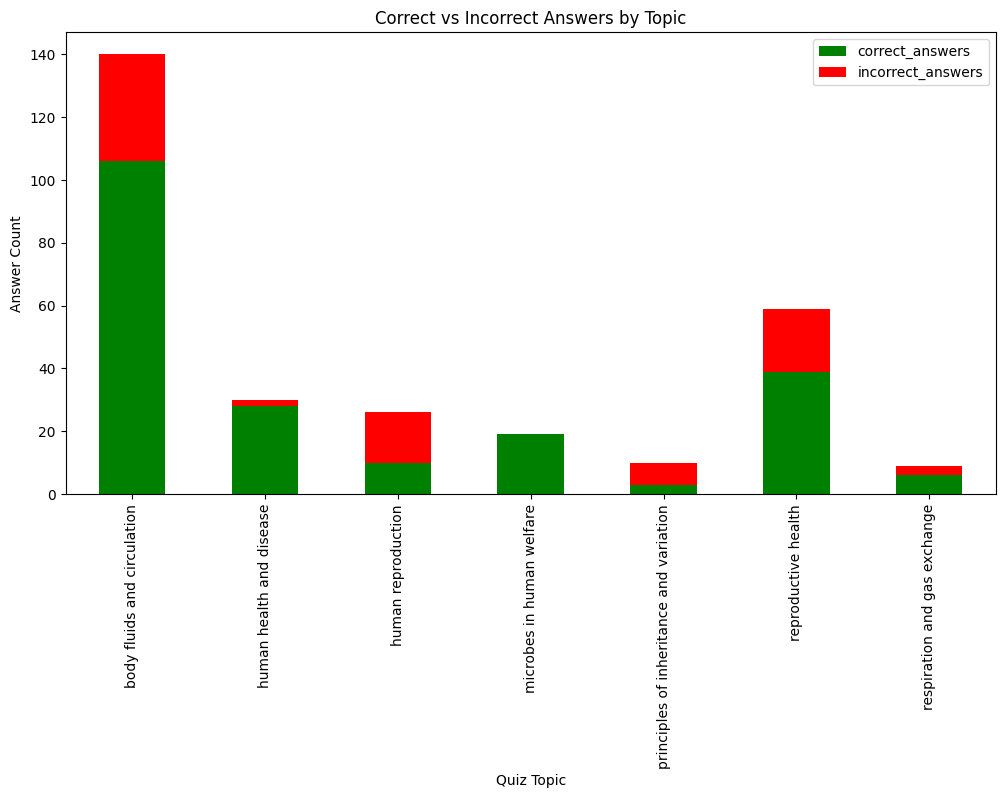

Weak Topics of Student ::( Student has to Prepare these topics as Performance is Not Good)
                                 quiz_topic
0              body fluids and circulation
1                       human reproduction
2  principles of inheritance and variation
3                      reproductive health
4             respiration and gas exchange

Bad Performance Stats ::( These are the stats where student does not perform well)
                                  quiz_topic  Percent  accuracy
1               body fluids and circulation    38.04      90.0
2               body fluids and circulation    29.35      50.0
3               body fluids and circulation    26.25      90.0
4               body fluids and circulation    28.75      96.0
5               body fluids and circulation     4.00      31.0
7                        human reproduction     6.74      38.0
9   principles of inheritance and variation     2.12      30.0
10                      reproductive health    45.45     100.

In [657]:
#Providing the cleaned_data and user id to show the information about user
Recommendation_for_user(cleaned_data,'YcDFSO4ZukTJnnFMgRNVwZTE4j42')

# Insights for each data visuals above:
## Performance :
      Performance is shown above where total score accuracy percentage and performance category is shown whether performance is excellent good bad or poor.
      For this user performance is below average, as result of most of quiz were poor but user performed excellent in two quizzes.
## BarPlot1 :
      This Barplot is straightly showing user only performed well in two topics only and needs to improve in other topics.
## Barplot2 :
      In This plot most of the times accuracy is good but performance is not there might be two reasons for this either (1) user is not able to manage his time and taking too much time to solve the problems or (2) User does not have enough knowledge then he has to focus on the topics recommended.
## Facetgrid :
      This plot is showing the effect of change in time taken in seconds on performance and accuracy of each topic.
     here we can see in topic body fluids and circulation the user have used most of the time and accuracy is high but performance is low 
     this can be reffered as case (1) previously disccused. In this plot we get to know user's overall accuracy is good but performance is not good it shows user is not improving and learn new topics instead just solving quizzes.
## Heatmap :
      This Plot is showing the scores of each topic on particular date. As we can see in topic: reproductive health user scored 50.5 in previous date but in recent date user only scores 35 which shows user has not revised the topics properly or either having problem in particular types of problems.
## Barplot : 
      This Plot is showing the accuracy of the user in each topic. In topics human reproduction and reproductive health,count of incorrect answers are more than correct answers, this shows either (3) user is not giving enough time to solve the problems or (4) user have not practiced well and need to improve his topics. Wherever, in topics : microbes in human welfare and human health and disease accuracy is good. 